In [1]:
import itertools
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread('image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

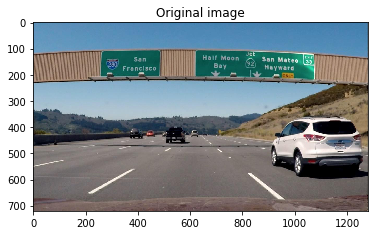

In [3]:
plt.title('Original image')
plt.imshow(image, cmap='gray')

In [4]:
def get_sobel(image, direction='x', threshold=(50, 100), kernel_size=9, debug=False):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobel = None
    if direction == 'x':
        sobel = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=kernel_size)
    elif direction == 'y':
        sobel = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=kernel_size)


    sobel_abs = np.absolute(sobel)
    sobel_max = np.max(sobel)

    sobel_normalized = np.uint8(255 * sobel_abs / sobel_max)
    mask = np.zeros_like(sobel_normalized)
    mask[(sobel_normalized >= threshold[0]) & (sobel_normalized <= threshold[1])] = 255 if debug else 1

    if debug:
        cv2.imwrite('./results/sobel/{}_k-{}_{}.png'.format(direction, threshold, kernel_size), mask)

    return mask

def get_sobel_magnitude(image, threshold=(50, 100), kernel_size=9, debug=False):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=kernel_size)
    sobelxy = np.sqrt(np.square(sobelx) + np.square(sobely))
    
    sobelxy_max = np.max(sobelxy)
    sobelxy_normalized = np.uint8(sobelxy * 255 / sobelxy_max)

    mask = np.zeros_like(sobelxy)
    mask[(sobelxy_normalized >= threshold[0]) & (sobelxy_normalized <= threshold[1])] = 255 if debug else 1
    
    if debug:
        cv2.imwrite('./results/sobelxy/xy_k-{}_{}.png'.format(kernel_size, threshold), np.uint8(mask))

    return mask

def get_sobel_angular(image, threshold=(0.8, 1.2), kernel_size=9, debug=False):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=kernel_size)
    
    sobel_ang = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    
    mask = np.zeros_like(sobel_ang)
    mask[(sobel_ang >= threshold[0]) & (sobel_ang <= threshold[1])] = 255 if debug else 1
    
    if debug:
        cv2.imwrite('./results/angular/ang_k-{}_{}.png'.format(kernel_size, threshold), np.uint8(mask))
        
    return mask

In [95]:
# if you want to compare outputs
for filter_size in range(5, 25, 2):
    for low in range(30, 130+1, 20):
        for high in range(50, 250+1, 20):
            if low < high:
                pass
#                 get_sobel(image, 'x', (low, high), kernel_size=filter_size, debug=True)
#                 get_sobel(image, 'y', (low, high), kernel_size=filter_size, debug=True)
#                 get_sobel_magnitude(image, (low, high), kernel_size=filter_size, debug=True)
                
angular_ranges = np.arange(0.05, 0.35, 0.05)
for angular_range in angular_ranges:
    get_sobel_angular(image, debug=True)

In [5]:
sobelx = get_sobel(image, 'x', (50, 150), 15)
sobely = get_sobel(image, 'y', (50, 150), 15) 
sobelxy = get_sobel_magnitude(image, (50, 150), 9)
angular = get_sobel_angular(image)

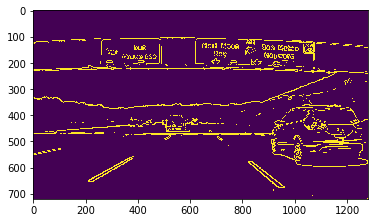

In [14]:
combined = np.zeros_like(sobelx)

combined[
    ((sobelx == 1) | (sobely == 1)) & ((sobelxy == 1) | (angular == 1))
] = 255

plt.imshow(combined)
    
    

In [119]:
array = np.arange(4)
for i in range(len(array)):
    subsets = []
    for subset in itertools.combinations(array, i):
        subsets.append(subset)
    print(subsets)
#     for j in range(len(subsets)):
#         print(j)
#         print(subsets[j], subsets[-j])
    


[()]
[(0,), (1,), (2,), (3,)]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
